<a href="https://colab.research.google.com/github/betr0dalf/MMPZ/blob/main/MMPZ_NovikovDV_sem2_prac0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математическое моделирование прикладных задач
# Практическая работа № 0
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

## Задание


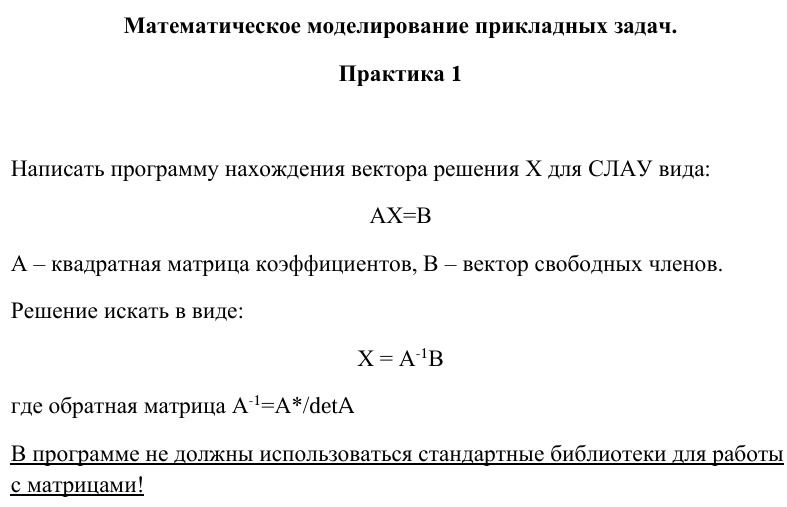

## Решение


In [6]:
def is_number(value):
    """Проверяет, является ли значение числом"""
    try:
        float(value)
        return True
    except ValueError:
        return False

def create_matrix(n):
    """Создает матрицу размера n x n с вводом от пользователя"""
    matrix = []
    print(f"\nВведите коэффициенты матрицы A размером {n}x{n}:")

    for i in range(n):
        row = []
        for j in range(n):
            while True:
                value = input(f"A[{i+1}][{j+1}] = ")
                if is_number(value):
                    row.append(float(value))
                    break
                else:
                    print("Ошибка! Введите число.")
        matrix.append(row)
        print(f"Строка {i+1} принята: {row}")

    return matrix

def create_vector(n):
    """Создает вектор размера n с вводом от пользователя"""
    vector = []
    print(f"\nВведите элементы вектора B размером {n}:")

    for i in range(n):
        while True:
            value = input(f"B[{i+1}] = ")
            if is_number(value):
                vector.append(float(value))
                break
            else:
                print("Ошибка! Введите число.")
        print(f"Вектор B: {vector}")

    return vector

def matrix_determinant(matrix):
    """Вычисляет определитель матрицы"""
    n = len(matrix)

    # Базовый случай для матрицы 1x1
    if n == 1:
        return matrix[0][0]

    # Базовый случай для матрицы 2x2
    if n == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    det = 0
    for j in range(n):
        # Создаем минор
        minor = []
        for i in range(1, n):
            row = []
            for k in range(n):
                if k != j:
                    row.append(matrix[i][k])
            minor.append(row)

        # Рекурсивно вычисляем определитель минора
        sign = 1 if j % 2 == 0 else -1
        det += sign * matrix[0][j] * matrix_determinant(minor)

    return det

def matrix_transpose(matrix):
    """Транспонирует матрицу"""
    n = len(matrix)
    transposed = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            transposed[j][i] = matrix[i][j]

    return transposed

def matrix_cofactor(matrix):
    """Вычисляет матрицу алгебраических дополнений"""
    n = len(matrix)
    cofactor_matrix = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            # Создаем минор для элемента (i,j)
            minor = []
            for row_idx in range(n):
                if row_idx != i:
                    minor_row = []
                    for col_idx in range(n):
                        if col_idx != j:
                            minor_row.append(matrix[row_idx][col_idx])
                    minor.append(minor_row)

            # Вычисляем определитель минора
            minor_det = matrix_determinant(minor)

            # Знак алгебраического дополнения: (-1)^(i+j)
            sign = 1 if (i + j) % 2 == 0 else -1
            cofactor_matrix[i][j] = sign * minor_det

    return cofactor_matrix

def matrix_inverse(matrix, det):
    """Вычисляет обратную матрицу"""
    n = len(matrix)

    # Вычисляем матрицу алгебраических дополнений
    cofactor_matrix = matrix_cofactor(matrix)

    # Транспонируем матрицу алгебраических дополнений (получаем присоединенную матрицу)
    adjugate_matrix = matrix_transpose(cofactor_matrix)

    # Делим каждый элемент на определитель
    inverse_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            inverse_matrix[i][j] = adjugate_matrix[i][j] / det

    return inverse_matrix

def matrix_vector_multiply(matrix, vector):
    """Умножает матрицу на вектор"""
    n = len(matrix)
    result = [0] * n

    for i in range(n):
        for j in range(n):
            result[i] += matrix[i][j] * vector[j]

    return result

def print_matrix(matrix, name):
    """Выводит матрицу в удобном формате"""
    print(f"\n{name}:")
    for row in matrix:
        print("[" + " ".join(f"{x:8.3f}" for x in row) + "]")

def print_vector(vector, name):
    """Выводит вектор в удобном формате"""
    print(f"\n{name}:")
    print("[" + " ".join(f"{x:8.3f}" for x in vector) + "]")

def solve_slau():
    """Основная функция решения СЛАУ"""
    print("=" * 50)
    print("РЕШЕНИЕ СИСТЕМЫ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ")
    print("Система вида: A * X = B")
    print("Решение: X = A⁻¹ * B")
    print("=" * 50)

    while True:
        # Ввод размера системы
        while True:
            n_str = input("\nВведите размер системы (количество уравнений): ")
            if n_str.isdigit() and int(n_str) > 0:
                n = int(n_str)
                break
            else:
                print("Ошибка! Введите положительное целое число.")

        try:
            # Создание матрицы A и вектора B
            A = create_matrix(n)
            B = create_vector(n)

            # Вычисление определителя
            det = matrix_determinant(A)
            print(f"\nОпределитель матрицы A: det(A) = {det:.6f}")

            # Проверка на вырожденность
            if abs(det) < 1e-10:  # Маленькое число для учета погрешности вычислений
                print("Ошибка! Определитель матрицы A равен нулю или очень близок к нулю.")
                print("Система либо не имеет решения, либо имеет бесконечно много решений.")
                raise ValueError("Матрица вырождена")

            # Вычисление обратной матрицы
            A_inv = matrix_inverse(A, det)

            # Решение системы: X = A⁻¹ * B
            X = matrix_vector_multiply(A_inv, B)

            # Вывод результатов
            print("\n" + "=" * 50)
            print("РЕЗУЛЬТАТЫ РАСЧЕТА:")
            print("=" * 50)

            print_matrix(A, "Матрица коэффициентов A")
            print_vector(B, "Вектор свободных членов B")
            print_matrix(A_inv, "Обратная матрица A⁻¹")
            print_vector(X, "Вектор решения X")

            # Проверка решения: A * X должно быть равно B
            print("\nПроверка решения (A * X):")
            check_B = matrix_vector_multiply(A, X)
            print_vector(check_B, "A * X (должно быть равно B)")

            # Вычисление погрешности
            error = sum(abs(check_B[i] - B[i]) for i in range(n))
            print(f"Суммарная погрешность: {error:.10f}")

            break

        except ValueError as e:
            if str(e) == "Матрица вырождена":
                print("\nХотите попробовать с другими коэффициентами?")
                choice = input("Введите 'да' для повторения или любой другой символ для выхода: ")
                if choice.lower() != 'да':
                    break
            else:
                print(f"Произошла ошибка: {e}")
                break
        except Exception as e:
            print(f"Произошла непредвиденная ошибка: {e}")
            break

# Запуск программы
if __name__ == "__main__":
    solve_slau()
    print("\nПрограмма завершена. Спасибо за использование!")

РЕШЕНИЕ СИСТЕМЫ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ
Система вида: A * X = B
Решение: X = A⁻¹ * B

Введите размер системы (количество уравнений): 0
Ошибка! Введите положительное целое число.

Введите размер системы (количество уравнений): 0
Ошибка! Введите положительное целое число.

Введите размер системы (количество уравнений): 0
Ошибка! Введите положительное целое число.

Введите размер системы (количество уравнений): 0
Ошибка! Введите положительное целое число.

Введите размер системы (количество уравнений): 0
Ошибка! Введите положительное целое число.

Введите размер системы (количество уравнений): 
Ошибка! Введите положительное целое число.

Введите размер системы (количество уравнений): 0
Ошибка! Введите положительное целое число.

Введите размер системы (количество уравнений): 3

Введите коэффициенты матрицы A размером 3x3:
A[1][1] = 0
A[1][2] = 
Ошибка! Введите число.
A[1][2] = 
Ошибка! Введите число.
A[1][2] = 0
A[1][3] = 0
Строка 1 принята: [0.0, 0.0, 0.0]
A[2][1] = 0
A[2][2] =